In [1]:
from scipy import linalg as la
from scipy import optimize
import sympy
sympy.init_printing()
import numpy as np
import matplotlib.pyplot as plt

from __future__ import division
import inspect

Linear equation definition in sympy

In [18]:
A = sympy.Matrix([[2, 3], [5, 4]])
b = sympy.Matrix([4, 3])
A.rank()
A.condition_number()

sympy.N(_)

In [23]:
L, U, _ = A.LUdecomposition()
L

⎡ 1   0⎤
⎢      ⎥
⎣5/2  1⎦

In [24]:
L*U

⎡2  3⎤
⎢    ⎥
⎣5  4⎦

In [27]:
x = A.solve(b) # equivalent to A.LUsolve(b)
x

⎡-1⎤
⎢  ⎥
⎣2 ⎦

In [12]:
# print(inspect.getsource(sympy.N))

Linear equation definition with numpy/scipy using Numpy array

In [28]:
A = np.array([[2, 3], [5, 4]])
b = np.array([4, 3])
np.linalg.matrix_rank(A)
np.linalg.cond(A)
np.linalg.norm(A)

In [29]:
P, L, U = la.lu(A)
L

array([[1. , 0. ],
       [0.4, 1. ]])

In [31]:
L*U

array([[5. , 0. ],
       [0. , 1.4]])

In [32]:
la.solve(A, b)

array([-1.,  2.])

### Diff btwn symbolic and numeric approach

In [33]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
x = A.solve(b)
x

⎡2⋅p - 1 ⎤
⎢─────── ⎥
⎢ p - 1  ⎥
⎢        ⎥
⎢   1    ⎥
⎢────────⎥
⎢      1 ⎥
⎢-√p + ──⎥
⎣      √p⎦

In [34]:
p = sympy.symbols("p", positive=True)
A = sympy.Matrix([[1, sympy.sqrt(p)], [1, 1/sympy.sqrt(p)]])
b = sympy.Matrix([1, 2])
x_sym_sol = A.solve(b)
Acond = A.condition_number().simplify()

In [35]:
AA = lambda p: np.array([[1, np.sqrt(p)], [1, 1/np.sqrt(p)]])
bb = np.array([1, 2])
x_num_sol = lambda p: np.linalg.solve(AA(p), bb)

Text(0.5, 0, '$x$')

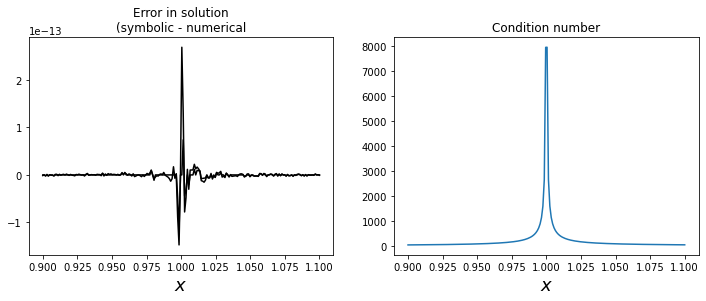

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
p_vec = np.linspace(0.9, 1.1, 200)

for n in range(2):
    x_sym = np.array([x_sym_sol[n].subs(p, pp).evalf() for pp in p_vec])
    x_num = np.array([x_num_sol(pp)[n] for pp in p_vec])
    axes[0].plot(p_vec, (x_num - x_sym)/x_sym, "k")

axes[0].set_title("Error in solution\n(symbolic - numerical")
axes[0].set_xlabel(r'$x$', fontsize=18)

axes[1].plot(p_vec, [Acond.subs(p, pp).evalf() for pp in p_vec])
axes[1].set_title("Condition number")
axes[1].set_xlabel(r'$x$', fontsize=18)

## Rectangular Systems  
m != n, in such system, the solution must be given in terms of the remaining free variables.   
This makes it difficult to treat this type of problem numerically, but a symbolic approach can often be used instead.

In [2]:
x_vars = sympy.symbols("x_1, x_2, x_3")
A = sympy.Matrix([[1,2,3],[4,5,6]])
x = sympy.Matrix(x_vars)
b = sympy.Matrix([7, 8])
sympy.solve(A*x - b, x_vars)

Minimize residual using `scipy.la.lstsq`

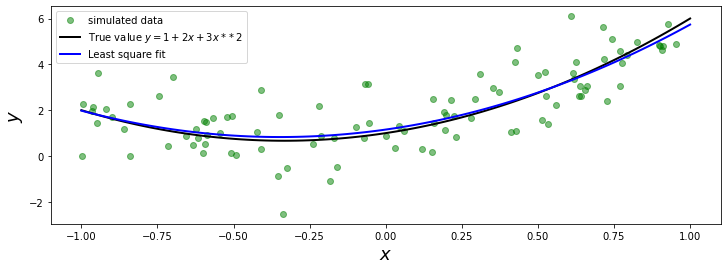

In [6]:
# Define true model Parameters
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2,3
y_exact = a + b*x + c*x**2

# simulate noisy data
m = 100
X = 1 - 2 * np.random.rand(m)
Y = a + b*X + c*X**2 + np.random.randn(m)

# fit the data to the model using linear least square

A = np.vstack([X**0, X**1, X**2]) # see np.vander for alternative
sol, r, rank, s = la.lstsq(A.T, Y)
y_fit = sol[0] + sol[1]*x + sol[2]*x**2

fig, ax = plt.subplots(figsize=(12, 4))

ax.plot(X, Y, 'go', alpha=0.5, label='simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x**2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$y$", fontsize=18)
ax.legend(loc=2)